# Robustness of Graph Neural Networks at Scale - Quick Start

This notebook can be run in google colab and serves as a quick introduction to the [Robustness of Graph Neural Networks at Scale](https://github.com/sigeisler/robustness_of_gnns_at_scale) repository.

## 0. Setup

First, let's get the code and install requirements.


In [1]:
import config
%cd {config.PROJECT_DIR}

C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main


C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### Imports

In [2]:
# run
from timeit import default_timer as timer
import seml

In [3]:
#7 run
#%cd robustness_of_gnns_at_scale
from matplotlib import pyplot as plt

from experiments import (
    experiment_train,
    experiment_local_attack_direct,
    experiment_global_attack_direct
)

%matplotlib inline

%load_ext autoreload
%autoreload 2

C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\torch\utils\cpp_extension.py:414: UserWarning: Error checking compiler version for cl: [WinError 2] Das System kann die angegebene Datei nicht finden
  warnings.warn(f'Error checking compiler version for {compiler}: {error}')
Use from seml.experiment import setup_logger instead.
Note that seml.experiment.Experiment already includes the logger setup.
See https://github.com/TUM-DAML/seml/blob/master/examples/example_experiment.py


[05/03/25 09:44:35] WARNING  Importing setup_logger directly from seml is deprecated.                ]8;id=490505;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\seml\__init__.py\__init__.py]8;;\:]8;id=169063;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\seml\__init__.py#10\10]8;;\
                             Use from seml.experiment import setup_logger instead.                                 
                             Note that seml.experiment.Experiment already includes the logger setup.               
                             See                                                                                   
                             https://github.com/TUM-DAML/seml/blob/master/examples/example_experimen               
                             t.py                                                                                  

[05/03/25 09:44:35] WARNING  Importing setup_logger directly from seml is deprecated.                ]8;id=552942;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\seml\__init__.py\__init__.py]8;;\:]8;id=854480;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\seml\__init__.py#10\10]8;;\
                             Use from seml.experiment import setup_logger instead.                                 
                             Note that seml.experiment.Experiment already includes the logger setup.               
                             See                                                                                   
                             https://github.com/TUM-DAML/seml/blob/master/examples/example_experimen               
                             t.py                                                                                  

## 1. Training

For the training and evaluation code we decided to provide Sacred experiments which make it very easy to run the same code from the command line or on your cluster. To train or attack the models you can use the `script_execute_experiment` script and simply specify the respective configuration or execute the experiment directly by passing the desired configuration in [experiments/experiment_train.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_train.py#L74).

In the example below, we train a `GCN` on `Cora ML`.

[05/03/25 09:44:36] INFO     {'dataset': 'cora_ml', 'model_params': {'label': 'Vanilla      ]8;id=619802;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=539307;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#140\140]8;;\
                             GCN', 'model': 'GCN', 'do_cache_adj_prep': True, 'n_filters':                         
                             64, 'dropout': 0.5, 'svd_params': None, 'jaccard_params':                             
                             None, 'gdc_params': {'alpha': 0.15, 'k': 64}}, 'train_params':                        
                             {'lr': 0.01, 'weight_decay': 0.001, 'patience': 300,                                  
                             'max_epochs': 3000}, 'binary_attr': False, 'make_undirected':                         
                             True, 'seed': 0, 'artifact_dir': 'cache',                                             
                             'model_storage_type': 'demo', 'ppr_cache_params': {},                                 
                             'device': 'cpu', 'display_steps': 100, 'data_device': 'cpu'}                          

                    INFO     Training set size: 140                                         ]8;id=38931;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=133384;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#161\161]8;;\

                    INFO     Validation set size: 140                                       ]8;id=815537;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=840209;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#162\162]8;;\

                    INFO     Test set size: 2530                                            ]8;id=734834;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=613053;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#163\163]8;;\

                    INFO     Memory Usage after loading the dataset:                        ]8;id=247072;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=984734;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#183\183]8;;\

                    INFO     nan                                                            ]8;id=581375;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=26592;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#184\184]8;;\

C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\models\gcn.py:315: UserWarning: torch.sparse.SparseTensor(indices, values, *, device=) is deprecated.  Please use torch.sparse_coo_tensor(indices, values, dtype=, device=). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:634.)
  adj = get_ppr_matrix(torch.sparse.FloatTensor(edge_idx, edge_weight), **self.gdc_params)
C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\torch_sparse\tensor.py:574: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\SparseCsrTensorImpl.cpp:55.)
  return torch.sparse_csr_tensor(rowptr, col, value, self.sizes())


[05/03/25 09:44:37] INFO                                                                                ]8;id=194354;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=711993;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch    0: loss_train: 1.94657, loss_val: 1.94479, acc_train: 0.10000,               
                             acc_val: 0.18571                                                                      

[05/03/25 09:44:41] INFO                                                                                ]8;id=964177;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=125125;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  100: loss_train: 0.09288, loss_val: 0.42195, acc_train: 1.00000,               
                             acc_val: 0.88571                                                                      

[05/03/25 09:44:46] INFO                                                                                ]8;id=120333;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=415262;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  200: loss_train: 0.07167, loss_val: 0.37600, acc_train: 1.00000,               
                             acc_val: 0.90714                                                                      

[05/03/25 09:44:52] INFO                                                                                ]8;id=238848;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=915912;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  300: loss_train: 0.07151, loss_val: 0.39939, acc_train: 1.00000,               
                             acc_val: 0.88571                                                                      

[05/03/25 09:44:57] INFO                                                                                ]8;id=283925;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=661194;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  400: loss_train: 0.06845, loss_val: 0.38217, acc_train: 1.00000,               
                             acc_val: 0.90714                                                                      

[05/03/25 09:45:01] INFO                                                                                ]8;id=368787;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=541537;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  500: loss_train: 0.06988, loss_val: 0.36415, acc_train: 1.00000,               
                             acc_val: 0.89286                                                                      

[05/03/25 09:45:05] INFO                                                                                ]8;id=296026;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py\train.py]8;;\:]8;id=945742;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\rgnn_at_scale\train.py#81\81]8;;\
                             Epoch  600: loss_train: 0.06436, loss_val: 0.40361, acc_train: 1.00000,               
                             acc_val: 0.87857                                                                      

[05/03/25 09:45:08] INFO     Test accuracy is 0.834782600402832 with seed 0                 ]8;id=817512;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py\experiment_train.py]8;;\:]8;id=278516;file://C:\Users\kyawk\Desktop\robustness_of_gnns_at_scale-main\experiments\experiment_train.py#216\216]8;;\

                    INFO     Lock 2069081827152 acquired on cache\demo.json.lock                    ]8;id=203579;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=205681;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#274\274]8;;\

                    INFO     Lock 2069081827152 released on cache\demo.json.lock                    ]8;id=379691;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py\filelock.py]8;;\:]8;id=50121;file://C:\Users\kyawk\anaconda3\envs\Masterarbeit_2_0\Lib\site-packages\filelock.py#318\318]8;;\

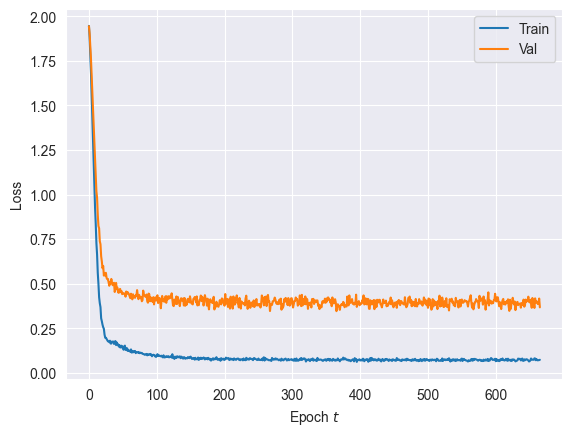

In [4]:
train_statistics = experiment_train.run(
    data_dir = './data',
    dataset = 'cora_ml',
    model_params = dict(
        label="Vanilla GCN",
        model="GCN",
        do_cache_adj_prep=True,
        n_filters=64,
        dropout=0.5,
        svd_params=None,
        jaccard_params=None,
        gdc_params={"alpha": 0.15, "k": 64}),
    train_params = dict(
        lr=1e-2,
        weight_decay=1e-3,
        patience=300,
        max_epochs=3000),
    binary_attr = False,
    make_undirected = True,
    seed=0,
    artifact_dir = 'cache',
    model_storage_type = 'demo',
    ppr_cache_params = dict(),
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    display_steps = 100,
    debug_level = "info"
)

# plot train and val loss curves
fig, ax = plt.subplots()

color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
ax.set_xlabel('Epoch $t$')
ax.set_ylabel("Loss")
ax.plot(train_statistics['trace_train'], color=color, label='Train')

color = plt.rcParams['axes.prop_cycle'].by_key()['color'][1]
ax.plot(train_statistics['trace_val'], color=color, label='Val')
ax.legend()
"123"
plt.show()

In [5]:
clean_acc = train_statistics["accuracy"]
print(f'Accuracy of the model: {100*clean_acc:.2f}%')

Accuracy of the model: 83.48%


## 1.1 Certificate integration

In [6]:
# certificate integration
import torch
import numpy as np
import copy
from sparse_smoothing.models import GCN
from sparse_smoothing.utils import load_and_standardize

loaded_from_robustness = torch.load(f'cache/demo/demo_1.pt', map_location='cpu', weights_only=False)

trained_state_dict = copy.deepcopy(loaded_from_robustness)

for key in list(trained_state_dict.keys()):
    if 'layers.0.' in key:
        new_key = key.replace('layers.0.gcn_0', 'conv1')
        trained_state_dict[new_key] = trained_state_dict.pop(key)  # Transpose if necessary

for key in list(trained_state_dict.keys()):
    if 'layers.1.' in key:
        new_key = key.replace('layers.1.gcn_1', 'conv2')
        trained_state_dict[new_key] = trained_state_dict.pop(key)  # Transpose if necessary

In [7]:
graph = load_and_standardize('data/cora_ml.npz')
n, d = graph.attr_matrix.shape
nc = graph.labels.max() + 1
pf_plus_att = 0.01
pf_minus_att = 0.6

In [8]:
model = GCN(n_features=d, n_classes=nc, n_hidden=64)#.cuda()
# Load the modified state dictionary
model.load_state_dict(trained_state_dict)

<All keys matched successfully>

In [9]:
print(model)
print(model.conv1.lin.weight)
print(model.conv2)



GCN(
  (conv1): SparseGCNConv(2879, 64)
  (conv2): GCNConv(64, 7)
)
Parameter containing:
tensor([[-0.0023, -0.0189, -0.0035,  ..., -0.0007, -0.0108, -0.0372],
        [-0.0070, -0.0108,  0.0022,  ..., -0.0066,  0.0141, -0.0339],
        [-0.0054, -0.0265, -0.0035,  ..., -0.0038, -0.0105, -0.0156],
        ...,
        [-0.0097, -0.0432,  0.0009,  ..., -0.0076, -0.0051, -0.0220],
        [ 0.0114,  0.0189,  0.0013,  ...,  0.0031,  0.0030, -0.0291],
        [ 0.0093, -0.0134, -0.0022,  ...,  0.0038,  0.0085,  0.0331]],
       requires_grad=True)
GCNConv(64, 7)


In [10]:
edge_idx = torch.LongTensor(np.stack(graph.adj_matrix.nonzero()))#.cuda()
attr_idx = torch.LongTensor(np.stack(graph.attr_matrix.nonzero()))#.cuda()

In [11]:
from sparse_smoothing.prediction import predict_smooth_gnn
#n_samples_eval = 100_000
#n_samples_eval = 10_000
n_samples_eval = 5000
#n_samples_eval = 100

sample_config = {
    'n_samples': n_samples_eval,
    'pf_plus_adj': 0.01, #0
    'pf_minus_adj': 0.6, #0
    'pf_plus_att': 0,# 0.01
    'pf_minus_att': 0,# 0.6
}
batch_size = 50

sample_config_pre_eval = sample_config.copy()
sample_config_pre_eval['n_samples'] = 1_000

import torch

# we a small number of samples to estimate the majority class
pre_votes = predict_smooth_gnn(attr_idx=attr_idx, edge_idx=edge_idx,
                               sample_config=sample_config_pre_eval,
                               model=model, n=n, d=d, nc=nc,
                               batch_size=batch_size)

# we use a larger number of samples to estimate a lower bound
# on the probability of observing the majority class
votes = predict_smooth_gnn(attr_idx=attr_idx, edge_idx=edge_idx,
                           sample_config=sample_config,
                           model=model, n=n, d=d, nc=nc,
                           batch_size=batch_size)

print(votes)


[[4860    0    0 ...    0  138    2]
 [4449   10    0 ...    5  479   57]
 [2820    2    0 ...    0 2170    8]
 ...
 [4378    0    0 ...    9  526   87]
 [2610    0    0 ...    0  800 1590]
 [4121    0    0 ...   45  371  463]]


In [22]:
from sparse_smoothing.cert import p_lower_from_votes, binary_certificate_grid


conf_alpha = 0.01

# compute the lower bound on the probability of the majority class
p_lower = p_lower_from_votes(votes=votes, pre_votes=pre_votes, alpha=conf_alpha, n_samples=n_samples_eval)

# compute the binary-class certificate 2D grid (for all pairs of ra and rd radii)
# where grid_binary_class > 0.5 means the instance is robust
grid_binary_class, *_ = binary_certificate_grid(pf_plus=pf_plus_att, pf_minus=pf_minus_att,
                                            p_emps=p_lower, reverse=False, progress_bar=True)

print(grid_binary_class)
# TODO: verbinde mehrere Zertifikate

max_ra=3, max_rd=12, min_p_emp=0.6970



[[[1.00000000e+00 9.44041667e-01 9.07668750e-01 ... 4.97116872e-03
   4.83561202e-03 3.96531028e-03]
  [5.85506581e-01 5.76085859e-01 5.57941667e-01 ... 3.07403693e-03
   3.01167422e-03 2.50773256e-03]
  [3.54852473e-01 3.51506581e-01 3.42865859e-01 ... 1.90026872e-03
   1.87458878e-03 1.58359463e-03]
  [2.15062105e-01 2.14452473e-01 2.10638581e-01 ... 1.17430536e-03
   1.16615703e-03 9.98644862e-04]
  [1.78484201e-01 1.30822105e-01 1.29370073e-01 ... 7.25456940e-04
   7.25056426e-04 6.28960130e-04]]

 [[1.00000000e+00 8.00494268e-01 6.70815542e-01 ... 1.53659468e-04
   1.52545913e-04 1.18050307e-04]
  [5.32780264e-01 4.89087435e-01 4.14394268e-01 ... 9.43559446e-05
   9.42808471e-05 7.41661337e-05]
  [3.22897130e-01 2.98780264e-01 2.55867435e-01 ... 8.98500913e-05
   5.82489447e-05 4.65404357e-05]
  [1.95695230e-01 1.82497130e-01 1.57912264e-01 ... 7.70819512e-05
   3.59749308e-05 2.91725655e-05]
  [1.18603170e-01 1.11455230e-01 9.74147295e-02 ... 6.04730541e-05
   2.22108163e-05 1.8

In [23]:
grid_radii = (grid_binary_class>0.5)

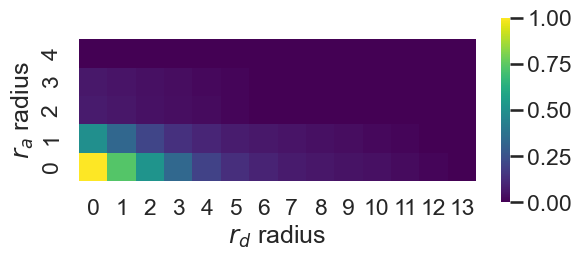

In [24]:
import seaborn as sns

heatmap = (grid_binary_class>0.5).mean(0)
sns.set_context('talk')
sns.heatmap(heatmap,
            cmap='viridis',
            vmin=0, vmax=1, square=True, cbar_kws={"shrink": .5})
plt.xlim(0, heatmap.shape[1])
plt.ylim(0, heatmap.shape[0])
plt.xlabel('$r_d$ radius')
plt.ylabel('$r_a$ radius')
plt.show()

In [25]:
from sparse_smoothing.cert import regions_discrete, compute_rho_for_many
# if pf_plus = pf_minus any combination of ra+rd+rc=r gives the same result.
pf_plus = pf_minus = 0.8
ra = 1
rd = 0
rc = 0

n_discrete_categories = 2

regions = regions_discrete(ra=ra, rd=rd, rc=rc, k=n_discrete_categories, pf_plus=pf_plus, pf_minus=pf_minus)

percent_robust = (compute_rho_for_many(regions=regions, p_emps=p_lower)>0.5).mean() * 100

print(f'At radius r={ra+rd+rc}, {percent_robust} percent of nodes are certifiably robust')

At radius r=1, 37.08185053380783 percent of nodes are certifiably robust


In [26]:
grid_radii_one_deletion_false = grid_radii[:,0,1]
grid_radii_one_deletion_false

array([ True,  True, False, ...,  True, False,  True])

## 2. Evaluation

For evaluation, we use the locally stored models. Similarly to training, we provide a script that runs the attacks for different seeds for all pretrained models. For all experiments, please check out the [config](https://github.com/sigeisler/robustness_of_gnns_at_scale/tree/main/config) folder.

### 2.1 Local PR-BCD Attack with grid_radii initialization
We provide an example for a `local PR-BCD` attack on the `Vanilla GCN` model trained previously by passing the desired configuration in [experiments/experiment_local_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_local_attack_direct.py#L68).

In [ ]:
local_prbcd_statistics_cert = experiment_local_attack_direct.run(
    data_dir = './data',
    dataset = 'cora_ml',
    attack = 'LocalPRBCD',
    attack_params = dict(
        ppr_cache_params = dict(
            data_artifact_dir = 'cache',
            data_storage_type = 'ppr'),
        #epochs = 500, # -> way too high for my setup, use 40-100
        epochs = 50,
        fine_tune_epochs = 100, #this may have to be adjusted to epochs
        search_space_size = 100, #is here the same varibale error as in global_attack ?
        block_size = 100,
        ppr_recalc_at_end = True,
        loss_type = 'Margin',
        lr_factor = 0.05),
    nodes = None,
    nodes_topk = 5,
    seed=0,
    epsilons = [1],
    min_node_degree = None,
    binary_attr = False,
    make_undirected = True,
    artifact_dir = 'cache',
    model_label = 'Vanilla GCN',
    model_storage_type = 'demo',
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    debug_level = "info",
    grid_radii=grid_radii,
    use_cert=True,
)

In [ ]:
n_change = 0
for node in local_prbcd_statistics_cert['results']:
    if node['margin'] < 0:
        n_change += 1
flipped_ratio_cert =  n_change / len(local_prbcd_statistics_cert['results'])
print(f'Percentage of changed node predictions for init with cert : {100*flipped_ratio_cert:.2f}%')

### 2.1.1 Local PR-BCD Attack without grid_radii initialization
We provide an example for a `local PR-BCD` attack on the `Vanilla GCN` model trained previously by passing the desired configuration in [experiments/experiment_local_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_local_attack_direct.py#L68).

In [ ]:
local_prbcd_statistics = experiment_local_attack_direct.run(
    data_dir = './data',
    dataset = 'cora_ml',
    attack = 'LocalPRBCD',
    attack_params = dict(
        ppr_cache_params = dict(
            data_artifact_dir = 'cache',
            data_storage_type = 'ppr'),
        #epochs = 500, # -> way too high for my setup, use 40-100
        epochs = 50,
        fine_tune_epochs = 100,
        search_space_size = 100,
        block_size = 100,
        ppr_recalc_at_end = True,
        loss_type = 'Margin',
        lr_factor = 0.05),
    nodes = None,
    nodes_topk = 5,
    seed=0,
    epsilons = [1],
    min_node_degree = None,
    binary_attr = False,
    make_undirected = True,
    artifact_dir = 'cache',
    model_label = 'Vanilla GCN',
    model_storage_type = 'demo',
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    debug_level = "info",
    grid_radii=grid_radii
)

In [ ]:
n_change = 0
for node in local_prbcd_statistics['results']:
    if node['margin'] < 0:
        n_change += 1
flipped_ratio =  n_change / len(local_prbcd_statistics['results'])
print(f'Percentage of changed node predictions : {100*flipped_ratio:.2f}%')

In [ ]:
n_change = 0
for node in local_prbcd_statistics_cert['results']:
    if node['margin'] < 0:
        n_change += 1
flipped_ratio_cert =  n_change / len(local_prbcd_statistics_cert['results'])
print(f'Percentage of changed node predictions for init with cert : {100*flipped_ratio_cert:.2f}%')

### 2.2 Global PR-BCD Attack with Cert

Now let's do the same with a non-local `PR-BCD` attack. For this, we use [experiments/experiment_global_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_global_attack_direct.py#L63).

In [102]:
from DeleteCache import delete_pert_files_and_folders
from IPython.display import clear_output
import csv
import os

results_global_prbcd_cert = []

# partly_drawn_nodes decides whether nodes have to be drawn completely from unrobust nodes_set
# Some changes, but not significant
partly_drawn_nodes = [True, True, True, True]
block_sizes = [50000]
epsilons = [0.25]
epochs = [30, 35, 40, 45, 50, 55]
fine_tune_epochs = [25]
#use_certificate = ["sampling_grid_radii", "sampling_grid_binary_class", "resampling_grid_radii", "sampling_grid_binary_class", "both_1", "both_2", "none"]
#use_certificate = ["sampling_grid_radii", "sampling_grid_binary_class", "sampling_grid_binary_class_alt", "none"]
#use_certificate = ["both_2_random", "sampling_grid_radii", "sampling_grid_binary_class_alt_22", "none"]
use_certificate = ["none"]
number_loops = len(partly_drawn_nodes) * len(block_sizes) * len(epsilons) * len(epochs) * len(fine_tune_epochs) * len(use_certificate)
loop = 1
# Idea: Variables for sampling with or without certificate usage
# "sampling_grid_radii" = use certificates with grid_radii only in sampling
# "sampling_grid_radii_alt_11" = use certificates with grid_radii only in sampling with alternative grid_radii
# "sampling_grid_binary_class" = use certificates with grid_binary_class only in sampling
# "sampling_grid_binary_class_alt_11" = use certificates with grid_binary_class (alternative version using grid_cell [1,1])
# "sampling_grid_binary_class_alt_22" = use certificates with grid_binary_class (alternative version using grid_cell [2,2])
# "resampling_grid_radii" = use certificates grid_radii only in resampling
# "resampling_grid_binary_class" = use certificates with grid_binary_class only in resampling       !!!!!! Experimental this is currently not in use !!!!!!! see both_2_random
# "both_1" = use certificate in both sampling (grid_radii) and resampling
# "both_2" = use certificate in both sampling (grid_binary_class) and resampling
# "both_2_random" = use certificate in both sampling (sampling_grid_radii) and resampling (but here random certificates usage with binary_class)
# "none" = use no certificate

for semi in partly_drawn_nodes:
    for block_size in block_sizes:
        for epsilon in epsilons:
            for epoch in epochs:
                for fine_tune_epoch in fine_tune_epochs:
                    for use_cert in use_certificate:
                        delete_pert_files_and_folders(
                        cache_dir="cache",
                        pert_adj_storage_type="evasion_global_adj",
                        pert_attr_storage_type="evasion_global_attr"
                        )
                        print("loop", loop, "of", number_loops)
                        loop += 1
                        start = timer()
                        global_prbcd_statistics_cert = experiment_global_attack_direct.run(
                            data_dir = './data',
                            dataset = 'cora_ml',
                            attack = 'PRBCD',
                            attack_params = dict(
                                epochs= epoch, #500
                                fine_tune_epochs= fine_tune_epoch, #100,
                                keep_heuristic="WeightOnly",
                                search_space_size=100_000, #this may be wrong variable name (block_size?)
                                block_size=block_size, #100_000
                                do_synchronize=True,
                                loss_type="tanhMargin",
                            ),
                            epsilons = [epsilon],
                            binary_attr = False,
                            make_undirected = True,
                            seed=0,
                            artifact_dir = 'cache',
                            pert_adj_storage_type = 'evasion_global_adj',
                            pert_attr_storage_type = 'evasion_global_attr',
                            model_label = 'Vanilla GCN',
                            model_storage_type = 'demo',
                            #device = 0,
                            #data_device = 0,
                            device = "cpu",
                            data_device = "cpu",
                            debug_level = "info",
                            semi = semi,
                            use_cert=use_cert,
                            grid_radii=grid_radii,
                            grid_binary_class=grid_binary_class,
                        )
                        end = timer()
                        time = end - start
                        
                        # CSV file path
                        csv_file = "global_prbcd_cert_results_testing_none.csv"
                        
                        # Check if CSV already exists
                        file_exists = os.path.isfile(csv_file)
                        
                        # Write row to CSV
                        with open(csv_file, "a", newline="") as f:
                            writer = csv.writer(f)
                            
                            # Write header only once
                            if not file_exists:
                                writer.writerow(["use_cert", "accuracy", "time", "epoch", "fine_tune_epoch", "epsilon", "block_size", "semi"])
                            
                            writer.writerow([
                                use_cert,
                                global_prbcd_statistics_cert["results"][0]['accuracy'],
                                time,
                                epoch,
                                fine_tune_epoch,
                                epsilon,
                                block_size,
                                semi
                            ])
                        
                        print("time: ", time)
                        print(use_cert + ": ")
                        print(global_prbcd_statistics_cert)
                        results_global_prbcd_cert.append((use_cert, 
                                                          "ACCURACY:", global_prbcd_statistics_cert["results"][0]['accuracy'],
                                                          "time:", time, 
                                                          "semi:", semi))
                        clear_output(wait=True)

def printItem(item):
    print(item)
    print("\n")

print("RESULTS")
[printItem(item) for item in results_global_prbcd_cert]


RESULTS
('none', 'ACCURACY:', 0.634782612323761, 'time:', 47.45446019992232, 'semi:', True)


('none', 'ACCURACY:', 0.6197628378868103, 'time:', 50.36985419993289, 'semi:', True)


('none', 'ACCURACY:', 0.6086956262588501, 'time:', 53.79704470001161, 'semi:', True)


('none', 'ACCURACY:', 0.5972331762313843, 'time:', 59.540432600071654, 'semi:', True)


('none', 'ACCURACY:', 0.5869565010070801, 'time:', 65.20331380004063, 'semi:', True)


('none', 'ACCURACY:', 0.5790513753890991, 'time:', 72.15886759990826, 'semi:', True)


('none', 'ACCURACY:', 0.634782612323761, 'time:', 43.32834429992363, 'semi:', True)


('none', 'ACCURACY:', 0.6197628378868103, 'time:', 50.343648500042036, 'semi:', True)


('none', 'ACCURACY:', 0.6086956262588501, 'time:', 52.11976010003127, 'semi:', True)


('none', 'ACCURACY:', 0.5972331762313843, 'time:', 59.15561389992945, 'semi:', True)


('none', 'ACCURACY:', 0.5869565010070801, 'time:', 64.82120050000958, 'semi:', True)


('none', 'ACCURACY:', 0.57905137538

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

### 2.2.0 Pandas data analysis

Mean Accuracy by Method:
 use_cert
none    0.604414
Name: accuracy, dtype: float64

Uncertified Accuracy (none): 0.6044
Certified Accuracy (mean): nan


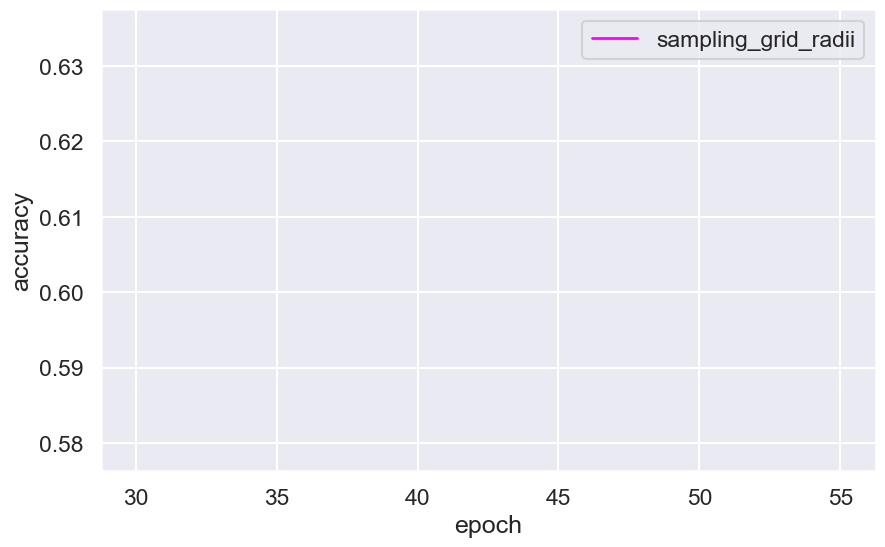

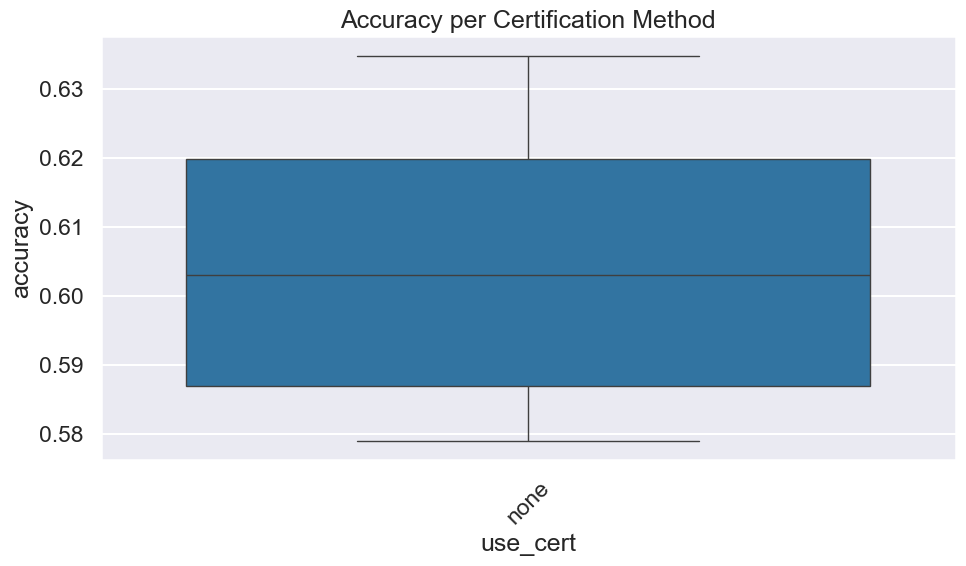

C:\Users\kyawk\AppData\Local\Temp\ipykernel_66768\816869457.py:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_other, x="epoch", y="accuracy", hue="use_cert", palette=palette)


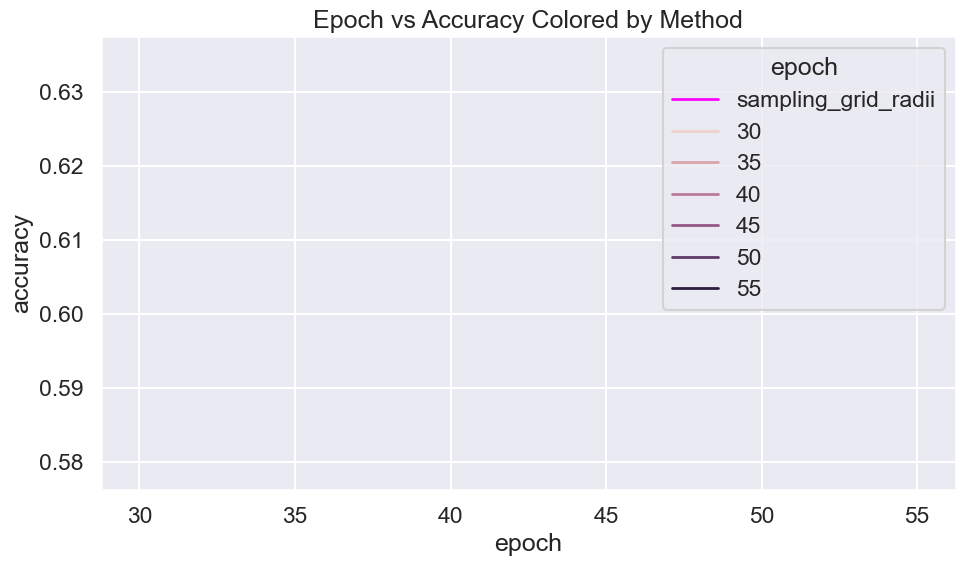

C:\Users\kyawk\AppData\Local\Temp\ipykernel_66768\816869457.py:49: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_other, x="epoch", y="time", hue="use_cert", palette=palette)


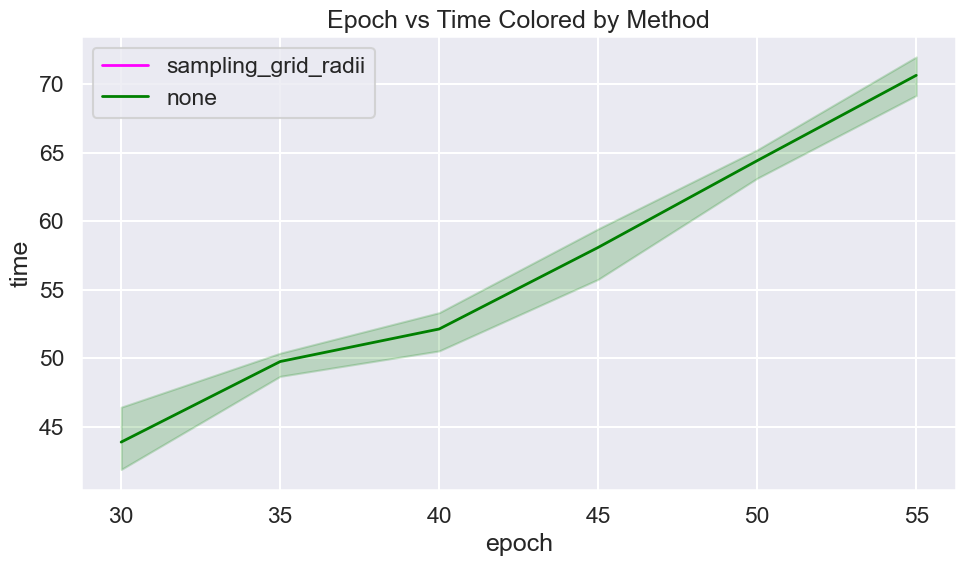

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV
df = pd.read_csv("global_prbcd_cert_results_random_both2_random.csv")  # Replace with your actual filename

# Check for and convert any incorrect types (if needed)
df["semi"] = df["semi"].astype(bool)
df["accuracy"] = df["accuracy"].astype(float)
df["time"] = df["time"].astype(float)

df_none = df[df["use_cert"] == "none"]
df_grid_radii = df[df["use_cert"] == "sampling_grid_radii"]
df_other = df[(df["use_cert"] != "none") & (df["use_cert"] != "sampling_grid_radii")]
# === BASIC ANALYSIS ===

# Grouped mean accuracy by certification method
acc_by_cert = df.groupby("use_cert")["accuracy"].mean()
print("Mean Accuracy by Method:\n", acc_by_cert)

# Compare certified vs. uncertified (none)
none_acc = df[df["use_cert"] == "none"]["accuracy"].mean()
certified_acc = df[df["use_cert"] != "none"]["accuracy"].mean()
print(f"\nUncertified Accuracy (none): {none_acc:.4f}")
print(f"Certified Accuracy (mean): {certified_acc:.4f}")
palette = ["#F72585", "#4361EE", "#4CC9F0"]
# === PLOTTING ===

# Accuracy distribution per method
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="use_cert", y="accuracy")
plt.xticks(rotation=45)
plt.title("Accuracy per Certification Method")
plt.tight_layout()
plt.show()

# Epoch vs. Accuracy by certification
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_other, x="epoch", y="accuracy", hue="use_cert", palette=palette)
sns.lineplot(data=df_grid_radii, x="epoch", y="accuracy", color='magenta', linewidth=2, label="sampling_grid_radii")
sns.lineplot(data=df_none, x="epoch", y="accuracy", color='green', linewidth=2, label="none")
plt.title("Epoch vs Accuracy Colored by Method")
plt.tight_layout()
plt.show()

# Epoch vs. Time by certification
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_other, x="epoch", y="time", hue="use_cert", palette=palette)
sns.lineplot(data=df_grid_radii, x="epoch", y="time", color='magenta', linewidth=2, label="sampling_grid_radii")
sns.lineplot(data=df_none, x="epoch", y="time", color='green', linewidth=2, label="none")
plt.title("Epoch vs Time Colored by Method")
plt.tight_layout()
plt.show()


### 2.2.1 Global PR-BCD Attack without Cert

Now let's do the same with a non-local `PR-BCD` attack. For this, we use [experiments/experiment_global_attack_direct.py](https://github.com/sigeisler/robustness_of_gnns_at_scale/blob/main/experiments/experiment_global_attack_direct.py#L63).

In [ ]:
from DeleteCache import delete_pert_files_and_folders

delete_pert_files_and_folders(
    cache_dir="cache",
    pert_adj_storage_type="evasion_global_adj",
    pert_attr_storage_type="evasion_global_attr"
)

global_prbcd_statistics = experiment_global_attack_direct.run(
    data_dir = './data',
    dataset = 'cora_ml',
    attack = 'PRBCD',
    attack_params = dict(
        epochs=50,
        fine_tune_epochs=100,
        keep_heuristic="WeightOnly",
        search_space_size=100_000,
        block_size=2000,
        do_synchronize=True,
        loss_type="tanhMargin",
    ),
    epsilons = [0.25],
    binary_attr = False,
    make_undirected = True,
    seed=0,
    artifact_dir = 'cache',
    pert_adj_storage_type = 'evasion_global_adj',
    pert_attr_storage_type = 'evasion_global_attr',
    model_label = 'Vanilla GCN',
    model_storage_type = 'demo',
    #device = 0,
    #data_device = 0,
    device = "cpu",
    data_device = "cpu",
    debug_level = "info",
)

print(global_prbcd_statistics)

In [68]:
perturbed_acc_cert = global_prbcd_statistics_cert["results"][0]['accuracy']
print(f'Clean accuracy: {100*clean_acc:.2f}%; Accuracy after global PRBCD attack with cert: {100*perturbed_acc_cert:.2f}%')

Clean accuracy: 83.48%; Accuracy after global PRBCD attack with cert: 82.09%


In [69]:
perturbed_acc = global_prbcd_statistics["results"][0]['accuracy']
print(f'Clean accuracy: {100*clean_acc:.2f}%; Accuracy after global PRBCD attack: {100*perturbed_acc:.2f}%')

Clean accuracy: 83.48%; Accuracy after global PRBCD attack: 80.08%
